In [2]:
from src.ingest import feature_to_city
from src.ingest import make_grid
import matplotlib.pyplot as plt
import geopandas as gpd



In [3]:
make_grid.main("Lyon,France", 500)

In [4]:
gdf = feature_to_city.main('lyon,france', 'ee-thomasbaptiste45', 2020, 500, 2154)

In [3]:
gdf = feature_to_city.load_city_feature('lyon','2020')

In [4]:
gdf

,LST,NDVI,id,date,BuildingVolume,BuiltSurface,Population,LST_anomaly,geometry
0,14.625797,0.140375,0,2020-02-24,23743.453039,2372.624309,20.550984,-2.165892,"POLYGON ((837834.667 6518240.458, 837834.667 6..."
1,14.786215,0.141846,1,2020-02-24,18976.259669,1855.292818,15.230067,-2.005474,"POLYGON ((837834.667 6518340.458, 837834.667 6..."
2,15.262060,0.147474,2,2020-02-24,10194.126722,946.093664,18.080367,-1.529629,"POLYGON ((837834.667 6518440.458, 837834.667 6..."
3,15.461584,0.175184,3,2020-02-24,15865.662088,1430.755495,28.413279,-1.330106,"POLYGON ((837834.667 6518540.458, 837834.667 6..."
4,13.791450,0.183386,4,2020-02-24,18425.021978,1742.087912,34.208295,-3.000239,"POLYGON ((837934.667 6518140.458, 837934.667 6..."
...,...,...,...,...,...,...,...,...,...
45679,26.608193,0.085575,5071,2020-09-10,44326.183562,3506.523288,100.399704,0.248970,"POLYGON ((847534.667 6518640.458, 847534.667 6..."
45680,27.234254,0.078474,5072,2020-09-10,29373.258242,2924.087912,67.119439,0.875032,"POLYGON ((847534.667 6518740.458, 847534.667 6..."
45681,28.825167,0.058457,5073,2020-09-10,35442.445055,3178.554945,66.736044,2.465945,"POLYGON ((847534.667 6518840.458, 847534.667 6..."
45682,27.643084,0.056910,5074,2020-09-10,64621.500000,5058.750000,36.459265,1.283862,"POLYGON ((847634.667 6518640.458, 847634.667 6..."


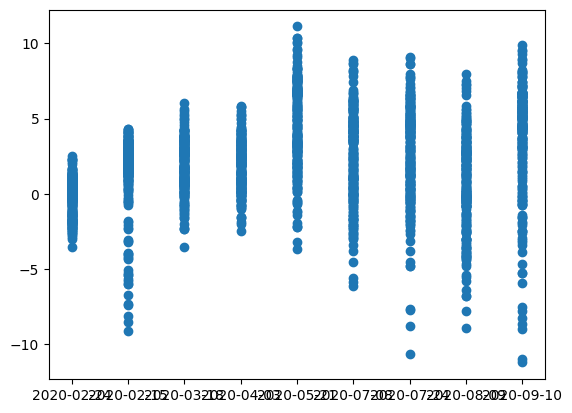

In [5]:
plt.scatter(gdf['date'], gdf['LST_anomaly'])

In [6]:
gdf["BuiltSurface"] = gdf["BuiltSurface"]/(100*100)
gdf["BuildingVolume"] = gdf["BuildingVolume"]/(100*100*100)

<Axes: >

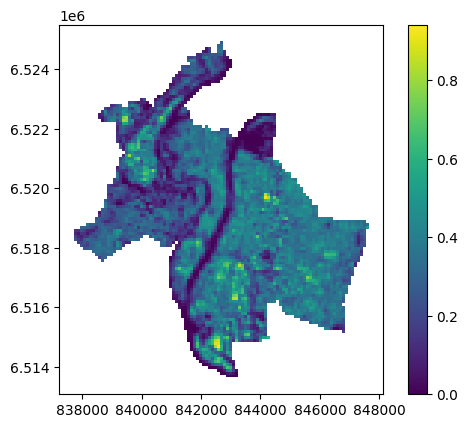

In [11]:
gdf.plot("BuiltSurface", legend = True)

<Axes: >

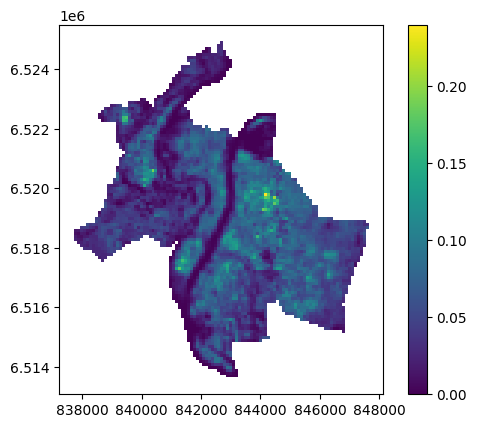

In [12]:
gdf.plot("BuildingVolume", legend = True)

In [19]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0)
gdf['cluster'] = kmeans.fit_predict(gdf[['LST_anomaly']])

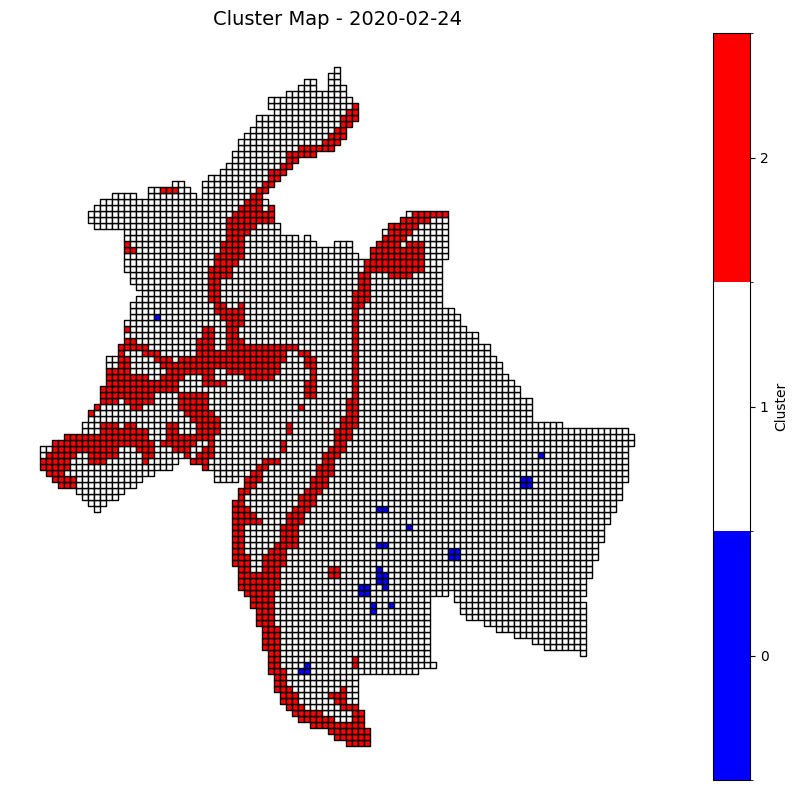

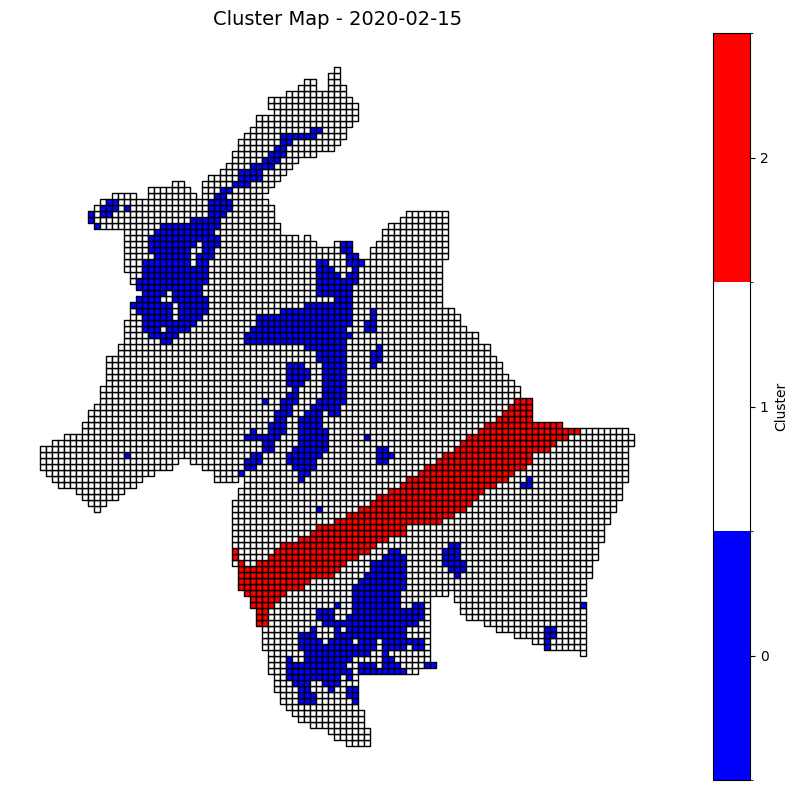

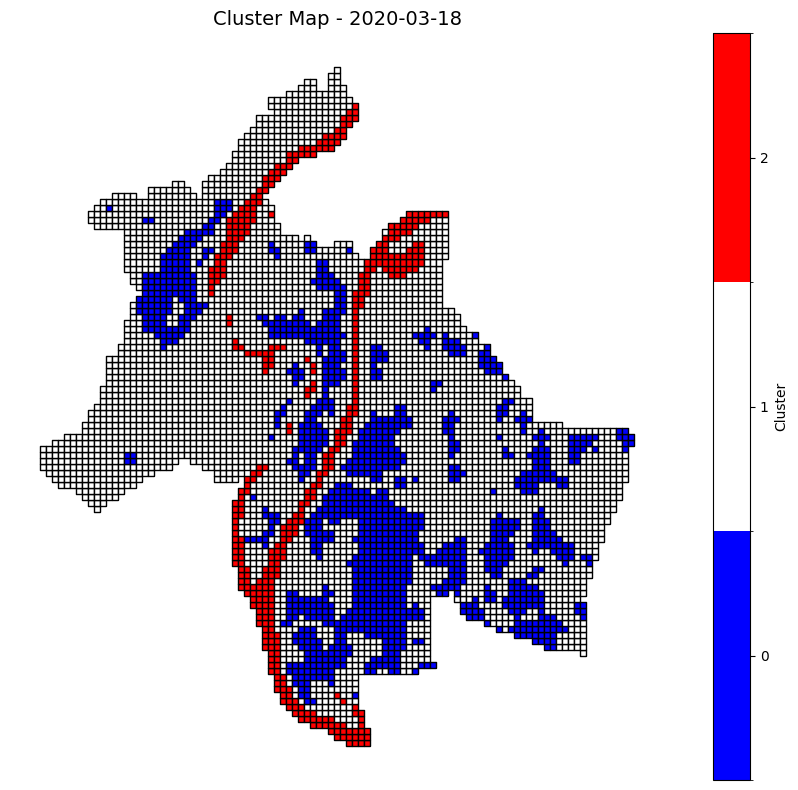

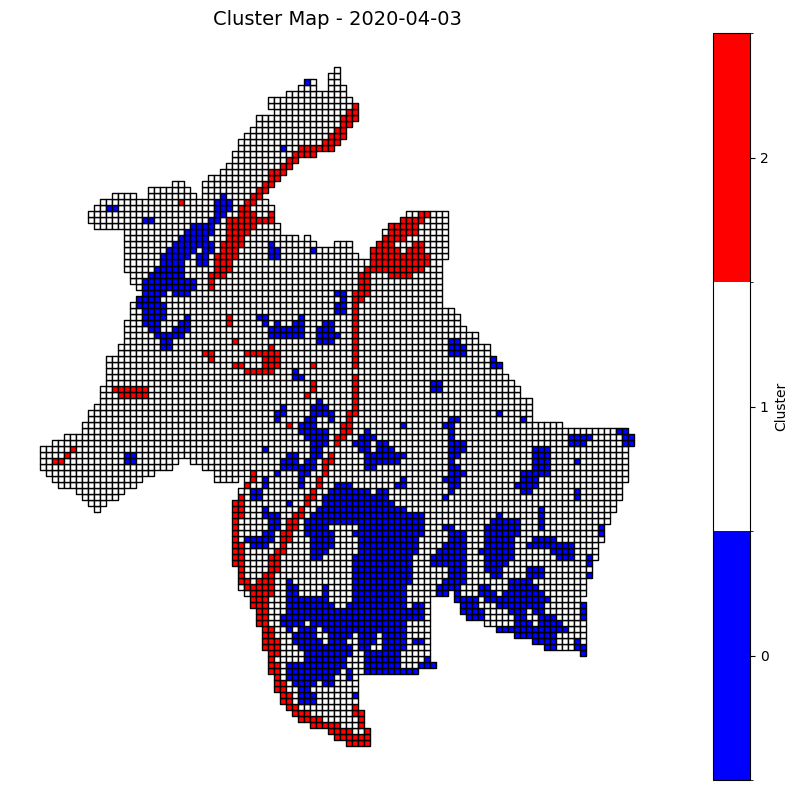

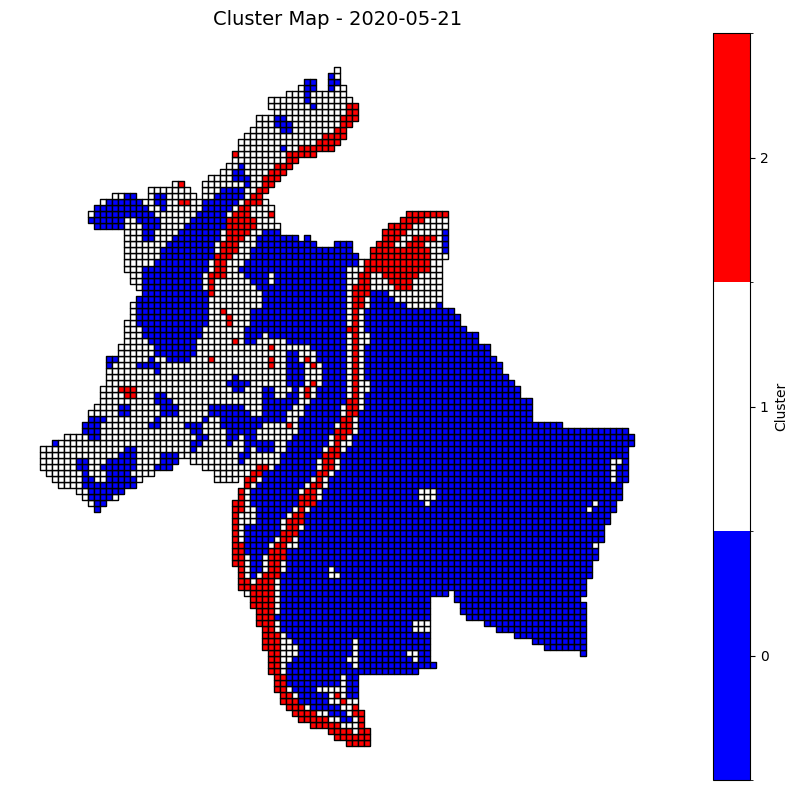

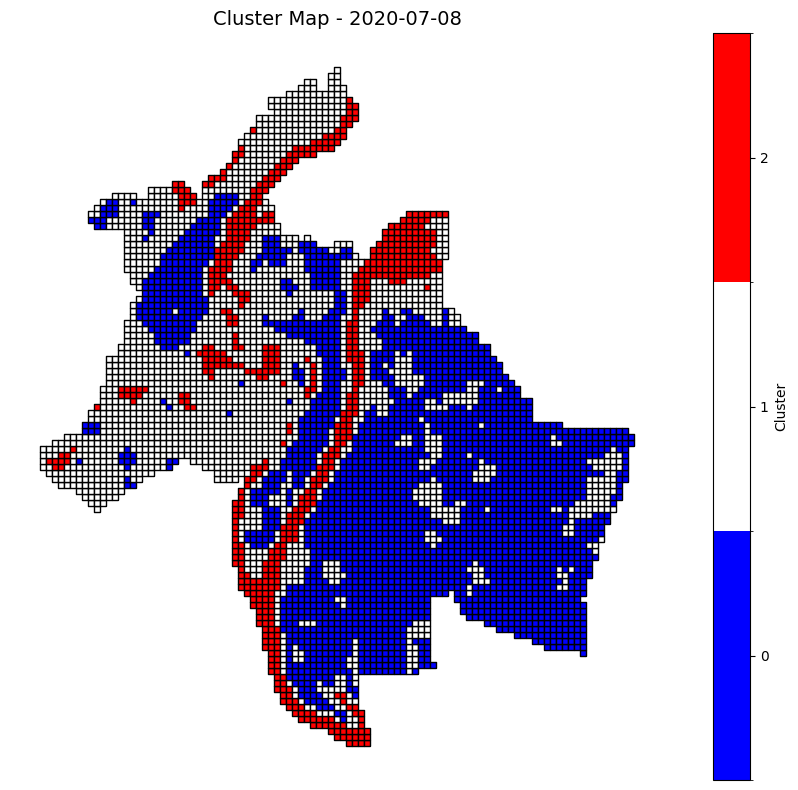

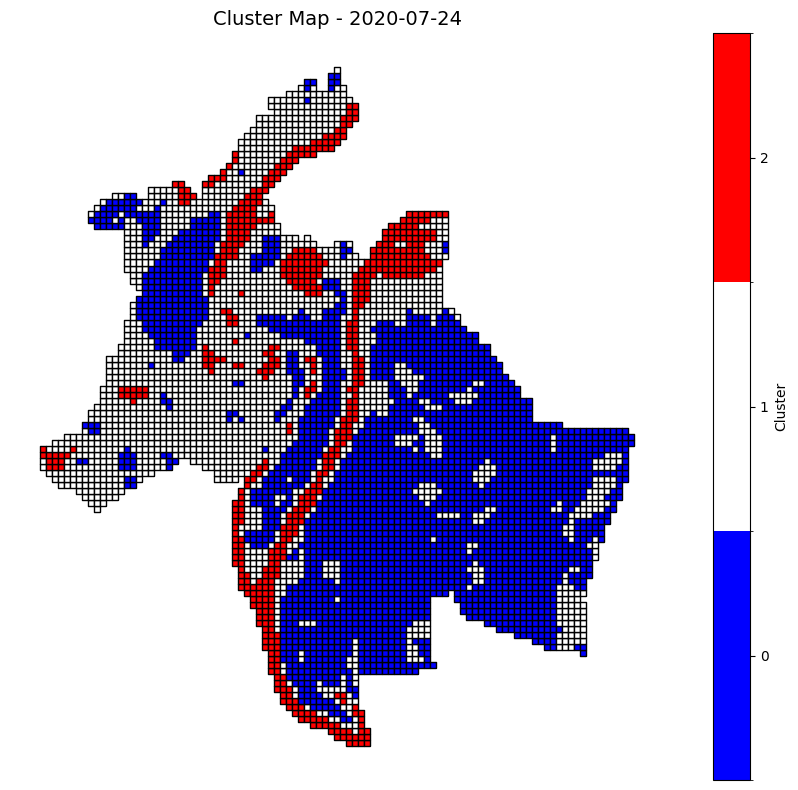

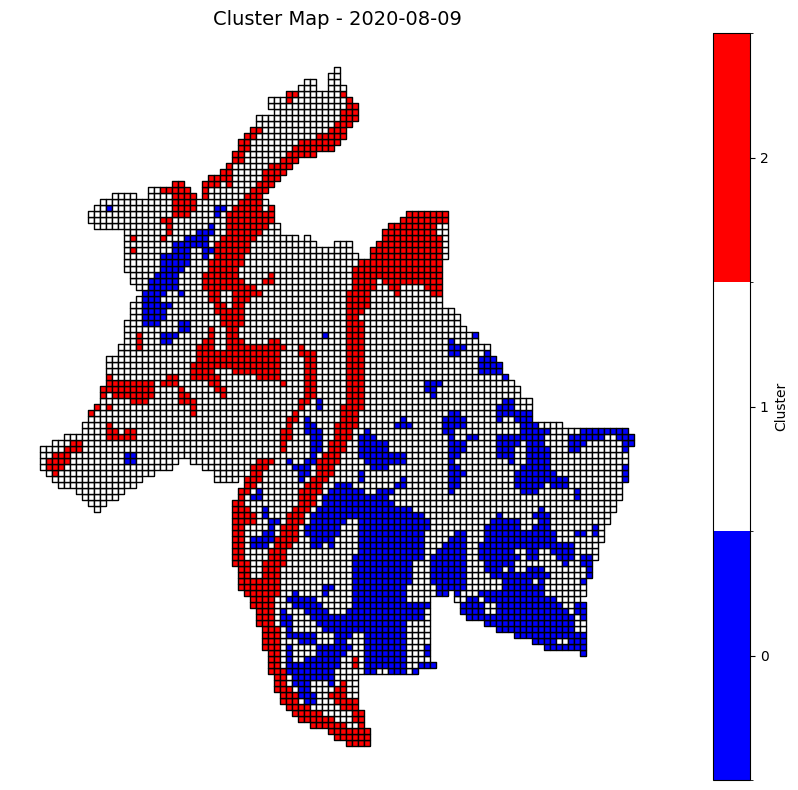

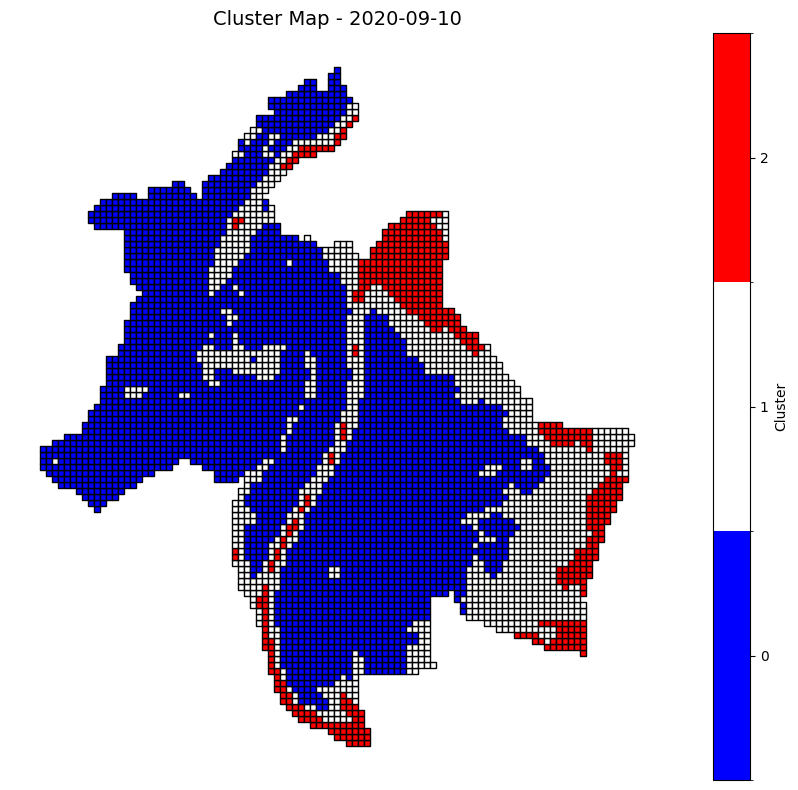

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ensure dates are in datetime format
gdf['date'] = pd.to_datetime(gdf['date'])
unique_dates = gdf['date'].dt.date.unique()

# Optional: define the range of clusters
cluster_labels = sorted(gdf['cluster'].unique())  # e.g., [0, 1, 2]

for date in unique_dates:
    subset = gdf[gdf['date'].dt.date == date]
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Create a discrete colormap
    cmap = plt.get_cmap('bwr', len(cluster_labels))
    norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, len(cluster_labels)+0.5, 1), ncolors=len(cluster_labels))
    
    # Plot and get the colorbar
    plot = subset.plot(column='cluster', ax=ax, cmap=cmap, norm=norm, edgecolor='black')
    
    # Manually create colorbar with set ticks
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []  # dummy array for ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, ticks=cluster_labels)
    cbar.set_label("Cluster")
    
    ax.set_title(f"Cluster Map - {date}", fontsize=14)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# # Ensure dates are in datetime format
# gdf['date'] = pd.to_datetime(gdf['date'])
# unique_dates = gdf['date'].dt.date.unique()

# for date in unique_dates:
#     subset = gdf[gdf['date'].dt.date == date]
    
#     fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#     plot = subset.plot(column='NDVI', ax=ax, cmap="viridis", edgecolor='black', legend=True)
#     ax.set_title(f"NDVI - {date}", fontsize=14)

#     plt.tight_layout()
#     plt.show()